In [25]:
# import Audio and Spectrogram classes from OpenSoundscape
# These classes help segment audio into displayable chunks for faster plotting
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glob
import os

In [26]:
# This builds the path to the output.txt file that we extracted by piping the linux ls command's output
# I used ls -lh > output.txt in my Recordings folder
session = '20220710_unit3'
filename = 'output' + session + '.txt'

file_path = filename

In [27]:
# We read in the .txt file using the file path and a separator of spaces.
# We set header=None so read_csv does not look for a header
# We also skip the first row of the raw output because the first row is 'Total <size of all files>'

data= pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)
print(data)

              0  1           2           3     4    5   6      7  \
0    -rwxr-xr-x  1  adkris1002  adkris1002  992K  Jul   9  12:45   
1    -rwxr-xr-x  1  adkris1002  adkris1002  343M  Jul   9  12:59   
2    -rwxr-xr-x  1  adkris1002  adkris1002  856M  Jul   9  13:29   
3    -rwxr-xr-x  1  adkris1002  adkris1002  856M  Jul   9  13:59   
4    -rwxr-xr-x  1  adkris1002  adkris1002  856M  Jul   9  14:29   
..          ... ..         ...         ...   ...  ...  ..    ...   
138  -rwxr-xr-x  1  adkris1002  adkris1002     0  Dec  31   1979   
139  -rwxr-xr-x  1  adkris1002  adkris1002     0  Dec  31   1979   
140  -rwxr-xr-x  1  adkris1002  adkris1002     0  Dec  31   1979   
141  -rwxr-xr-x  1  adkris1002  adkris1002  1.1K  Jul   9  12:47   
142  -rw-rw-r--  1  adkris1002  adkris1002     0  Jul  13  21:00   

                            8  
0         20220709_194556.WAV  
1         20220709_194756.WAV  
2         20220709_200000.WAV  
3         20220709_203000.WAV  
4         20220709_2100

<>:5: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \s
/tmp/ipykernel_51116/1068482600.py:5: DeprecationWarning: invalid escape sequence \s
  data= pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)


In [41]:
# We clean up and only extract the rows and columns we need.
# We don't need the first 4 columns or the last row which is the size of the output.txt file

list_np = data.to_numpy()[:-2,4:]
print(list_np)

[['992K' 'Jul' 9 '12:45' '20220709_194556.WAV']
 ['343M' 'Jul' 9 '12:59' '20220709_194756.WAV']
 ['856M' 'Jul' 9 '13:29' '20220709_200000.WAV']
 ['856M' 'Jul' 9 '13:59' '20220709_203000.WAV']
 ['856M' 'Jul' 9 '14:29' '20220709_210000.WAV']
 ['856M' 'Jul' 9 '14:59' '20220709_213000.WAV']
 ['856M' 'Jul' 9 '15:29' '20220709_220000.WAV']
 ['856M' 'Jul' 9 '15:59' '20220709_223000.WAV']
 ['856M' 'Jul' 9 '16:29' '20220709_230000.WAV']
 ['856M' 'Jul' 9 '16:59' '20220709_233000.WAV']
 ['856M' 'Jul' 9 '17:29' '20220710_000000.WAV']
 ['856M' 'Jul' 9 '17:59' '20220710_003000.WAV']
 ['856M' 'Jul' 9 '18:29' '20220710_010000.WAV']
 ['856M' 'Jul' 9 '18:59' '20220710_013000.WAV']
 ['856M' 'Jul' 9 '19:29' '20220710_020000.WAV']
 ['856M' 'Jul' 9 '19:59' '20220710_023000.WAV']
 ['856M' 'Jul' 9 '20:29' '20220710_030000.WAV']
 ['856M' 'Jul' 9 '20:59' '20220710_033000.WAV']
 ['856M' 'Jul' 9 '21:29' '20220710_040000.WAV']
 ['856M' 'Jul' 9 '21:59' '20220710_043000.WAV']
 ['856M' 'Jul' 9 '22:29' '20220710_05000

In [42]:
# We convert our new cleaner numpy array into a data frame with cleaner labels
# The time columns will have a year in some rows when the file is empty
# The file sizes also have M when it is mB (megabyte) and K when it is kB (kilobyte)
# There are no units for file sizes when the units are in bytes

df = pd.DataFrame(list_np, columns = ['File Size','Month','Date', 'Time', 'File Name'])

In [43]:
print(df)

    File Size Month Date   Time            File Name
0        992K   Jul    9  12:45  20220709_194556.WAV
1        343M   Jul    9  12:59  20220709_194756.WAV
2        856M   Jul    9  13:29  20220709_200000.WAV
3        856M   Jul    9  13:59  20220709_203000.WAV
4        856M   Jul    9  14:29  20220709_210000.WAV
..        ...   ...  ...    ...                  ...
136         0   Dec   31   1979  20220712_160000.WAV
137         0   Dec   31   1979  20220712_170000.WAV
138         0   Dec   31   1979  20220712_173000.WAV
139         0   Dec   31   1979  20220712_183000.WAV
140         0   Dec   31   1979  20220712_190000.WAV

[141 rows x 5 columns]


In [37]:
audio_path = '/home/adkris1002/Documents/UBNA_Research/AudiomothStuff/Recordings&Code/Audiomoth2Files/Foliage2022/'
session_dir = session

session_path = audio_path+session_dir
# Get list of all files in a given directory sorted by name
list_of_files = sorted(filter(os.path.isfile, glob.glob(session_path + '/*')))[:-1]
print(list_of_files)

['/home/adkris1002/Documents/UBNA_Research/AudiomothStuff/Recordings&Code/Audiomoth2Files/Foliage2022/20220710_unit3/20220709_194556.WAV', '/home/adkris1002/Documents/UBNA_Research/AudiomothStuff/Recordings&Code/Audiomoth2Files/Foliage2022/20220710_unit3/20220709_194756.WAV', '/home/adkris1002/Documents/UBNA_Research/AudiomothStuff/Recordings&Code/Audiomoth2Files/Foliage2022/20220710_unit3/20220709_200000.WAV', '/home/adkris1002/Documents/UBNA_Research/AudiomothStuff/Recordings&Code/Audiomoth2Files/Foliage2022/20220710_unit3/20220709_203000.WAV', '/home/adkris1002/Documents/UBNA_Research/AudiomothStuff/Recordings&Code/Audiomoth2Files/Foliage2022/20220710_unit3/20220709_210000.WAV', '/home/adkris1002/Documents/UBNA_Research/AudiomothStuff/Recordings&Code/Audiomoth2Files/Foliage2022/20220710_unit3/20220709_213000.WAV', '/home/adkris1002/Documents/UBNA_Research/AudiomothStuff/Recordings&Code/Audiomoth2Files/Foliage2022/20220710_unit3/20220709_220000.WAV', '/home/adkris1002/Documents/UBNA_

20220709_194556.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "
/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:251: UserWarning: Audio object is shorter than requested duration: 2.03064 sec instead of 5 sec
  warnings.warn(error_msg)


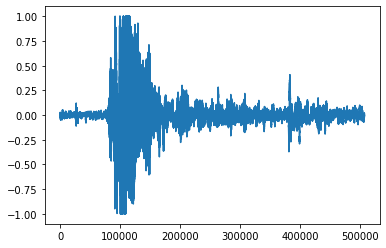

20220709_194756.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


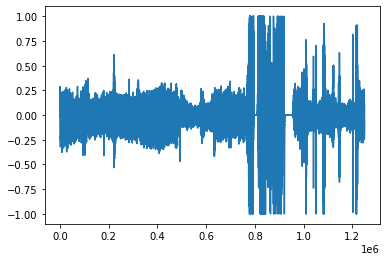

20220709_200000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


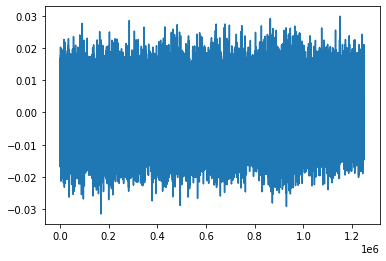

20220709_203000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


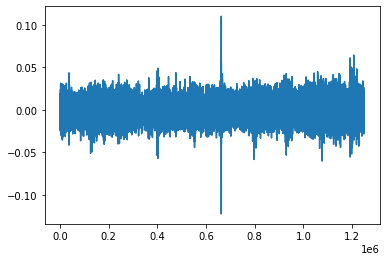

20220709_210000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


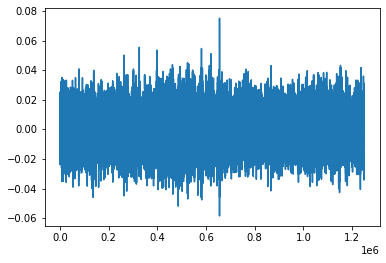

20220709_213000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


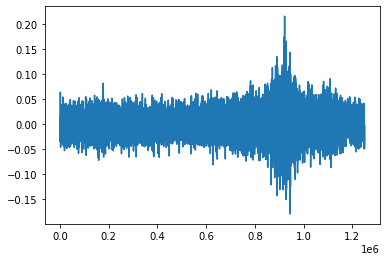

20220709_220000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


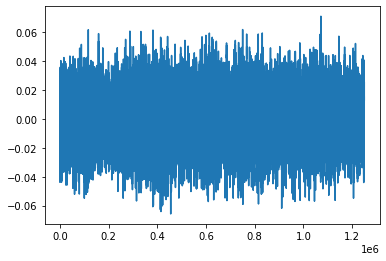

20220709_223000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


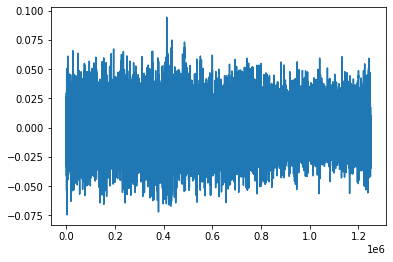

20220709_230000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


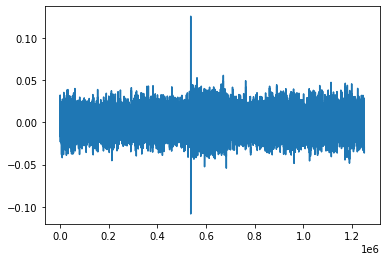

20220709_233000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


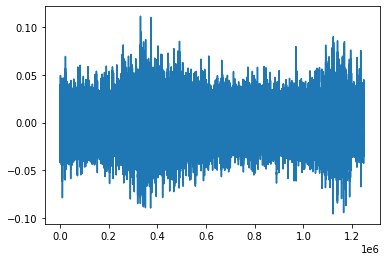

20220710_000000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


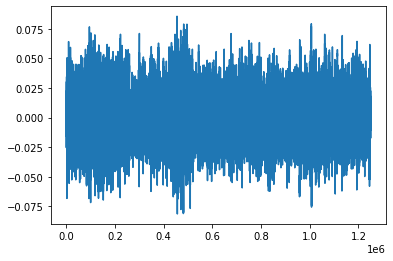

20220710_003000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


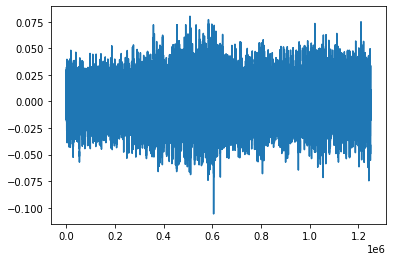

20220710_010000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


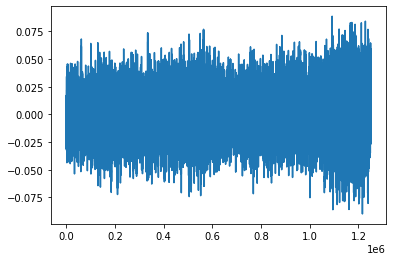

20220710_013000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


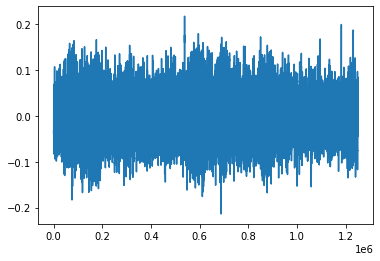

20220710_020000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


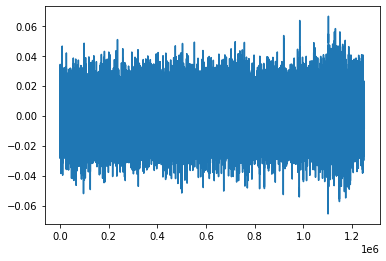

20220710_023000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


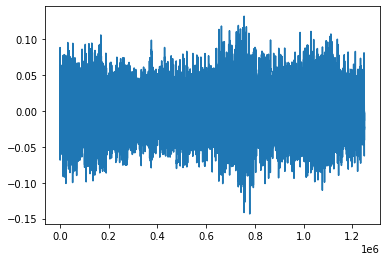

20220710_030000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


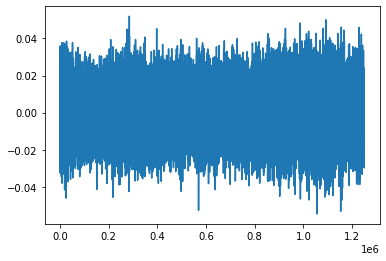

20220710_033000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


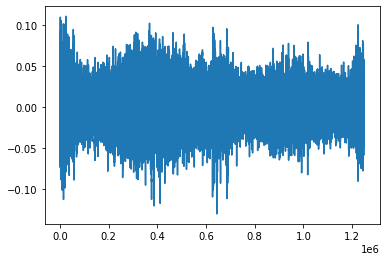

20220710_040000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


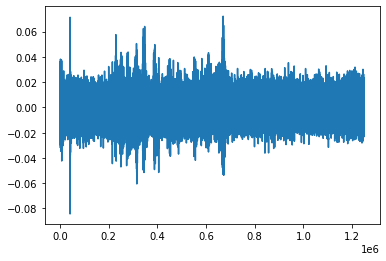

20220710_043000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


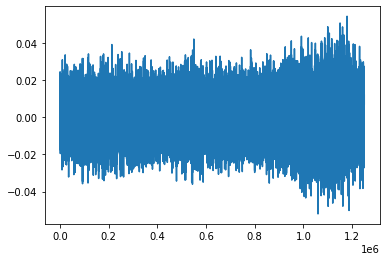

20220710_050000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


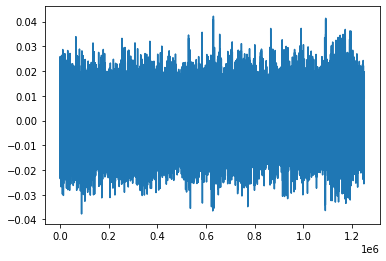

20220710_053000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


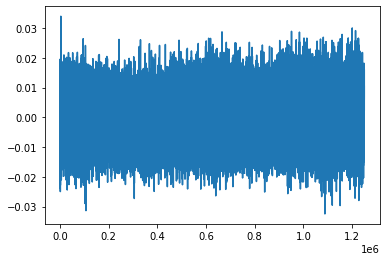

20220710_060000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


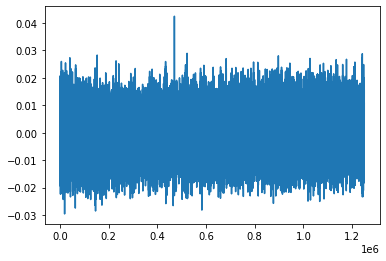

20220710_063000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


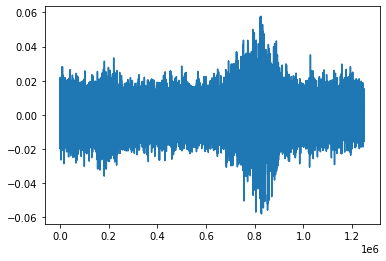

20220710_070000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


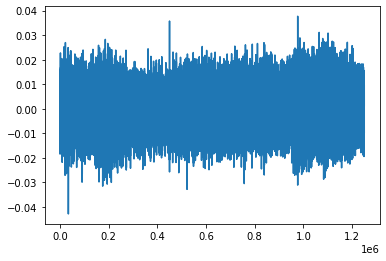

20220710_073000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


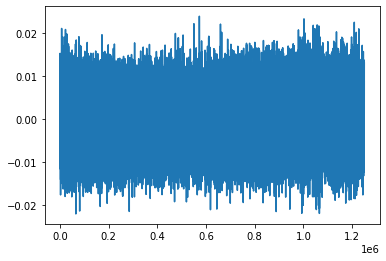

20220710_080000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


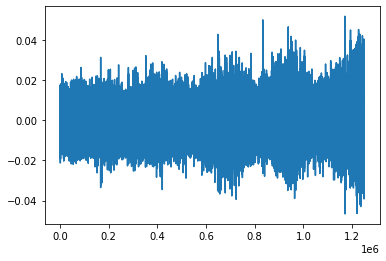

20220710_083000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


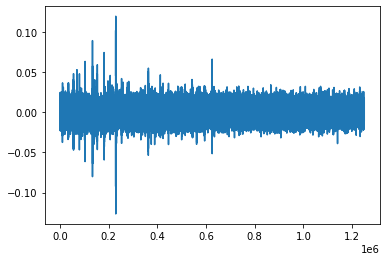

20220710_090000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


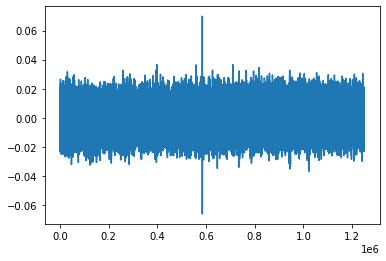

20220710_093000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


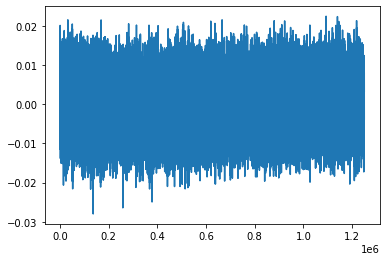

20220710_100000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


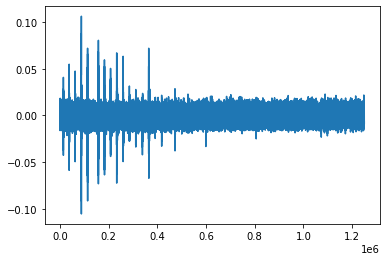

20220710_103000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


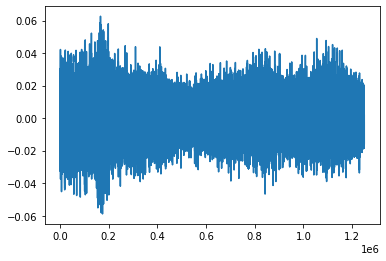

20220710_110000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


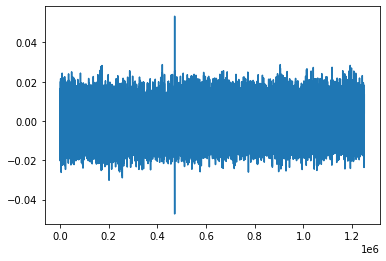

20220710_113000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


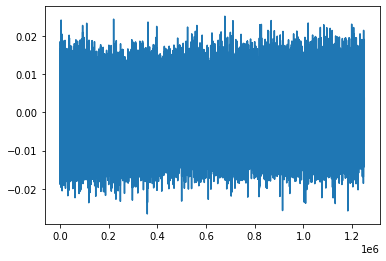

20220710_120000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


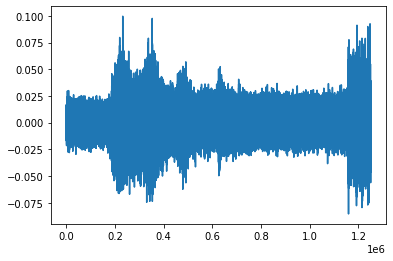

20220710_123000.WAV


/home/adkris1002/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/opensoundscape/audio.py:180: UserWarning: This seems to be an AudioMoth file, but parse_audiomoth_metadata() raised: list index out of range
  "This seems to be an AudioMoth file, "


In [ ]:
recording_status = []
energy_status = []
dur = 5
energy_threshold = 100

for file_path in list_of_files:
    file_name = file_path.split(session+'/')[1]
    print(file_name)
    if os.path.getsize(file_path) > 0:

        seg = Audio.from_file(file_path, duration=dur)
        energy = np.sum(np.abs(seg.samples)**2)
        plt.plot(seg.samples)
        plt.show()
        if (energy > 11):
            message = 'full with data'
            recording_status.append(message)
        elif (energy <= 11 and energy > 0):
            message = 'full but no data'
            recording_status.append(message)
        elif (energy == 0):
            message = 'very small but no data'
            recording_status.append(message)
        energy_status.append(energy)
    else:
        message = 'empty'
        recording_status.append('empty')
        energy_status.append(None)

In [45]:
df['Recording Status'] = recording_status
df['Energy in first 5 secs'] = energy_status
#print(recording_status)
print(df)

    File Size Month Date   Time            File Name Recording Status  \
0        992K   Jul    9  12:45  20220709_194556.WAV   full with data   
1        343M   Jul    9  12:59  20220709_194756.WAV   full with data   
2        856M   Jul    9  13:29  20220709_200000.WAV   full with data   
3        856M   Jul    9  13:59  20220709_203000.WAV   full with data   
4        856M   Jul    9  14:29  20220709_210000.WAV   full with data   
..        ...   ...  ...    ...                  ...              ...   
136         0   Dec   31   1979  20220712_160000.WAV            empty   
137         0   Dec   31   1979  20220712_170000.WAV            empty   
138         0   Dec   31   1979  20220712_173000.WAV            empty   
139         0   Dec   31   1979  20220712_183000.WAV            empty   
140         0   Dec   31   1979  20220712_190000.WAV            empty   

     Energy in first 5 secs  
0              10683.965820  
1              50491.625000  
2                 44.145470  
3  

In [47]:
# We save our dataframe as a .csv using \t as a separator

df.to_csv('file_sizes'+session+'.csv')